<a href="https://colab.research.google.com/github/kdemertzis/Earthquakes/blob/main/Code_SI/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
#!pip install pycaret
#!pip install shap
#!pip install modin[all]
#!pip uninstall lightgbm -y
#!pip install lightgbm --install-option=--gpu --install-option="--opencl-include-dir=/usr/local/cuda/include/" --install-option="--opencl-library=/usr/local/cuda/lib64/libOpenCL.so"
#!pip install -U ppscore

In [50]:
"""
    Import library
"""
##-- PyCaret
import pycaret
import modin
from pycaret.regression import *
##-- Pandas
import pandas as pd
from pandas import Series, DataFrame
##-- Scikit-learn
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps
%matplotlib inline

In [51]:
#data = pd.read_csv('/content/park_1st_shock.csv')

In [52]:
url = 'https://raw.githubusercontent.com/kdemertzis/Earthquakes/main/parkAng_total_89.csv'
# load the dataset
df = pd.read_csv(url)

In [53]:
df.head()

DI_PA_1st       PGA       PGV       PGD  ...     I_FVF      I_RG      SI_H  DI_PA
0        0.0  560.3557  103.5839  304.0645  ...  160.7839  546.4701  235.5055  0.818
1        0.0  153.8044   38.0404   36.2603  ...   93.7249  120.6639  104.4718  0.651
2        0.0  272.5990   29.1531    6.5092  ...   59.0348   16.6760  133.9642  0.191
3        0.0  463.0320   19.7604    2.2346  ...   31.6905    4.1948   44.4422  0.063
4        0.0   63.3482    2.7992    3.6205  ...    4.5804    6.9813    4.4720  0.025

[5 rows x 18 columns]

In [54]:
matrix = pps.matrix(df)
matrix

x  ...                                              model
0    DI_PA_1st  ...                                               None
1    DI_PA_1st  ...  DecisionTreeRegressor(ccp_alpha=0.0, criterion...
2    DI_PA_1st  ...  DecisionTreeRegressor(ccp_alpha=0.0, criterion...
3    DI_PA_1st  ...  DecisionTreeRegressor(ccp_alpha=0.0, criterion...
4    DI_PA_1st  ...  DecisionTreeRegressor(ccp_alpha=0.0, criterion...
..         ...  ...                                                ...
319      DI_PA  ...  DecisionTreeRegressor(ccp_alpha=0.0, criterion...
320      DI_PA  ...  DecisionTreeRegressor(ccp_alpha=0.0, criterion...
321      DI_PA  ...  DecisionTreeRegressor(ccp_alpha=0.0, criterion...
322      DI_PA  ...  DecisionTreeRegressor(ccp_alpha=0.0, criterion...
323      DI_PA  ...                                               None

[324 rows x 9 columns]

In [55]:
def heatmap(df):
    df = df[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
    ax = sns.heatmap(df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)
    ax.set_title("PPS matrix")
    ax.set_xlabel("feature")
    ax.set_ylabel("target")
    return ax

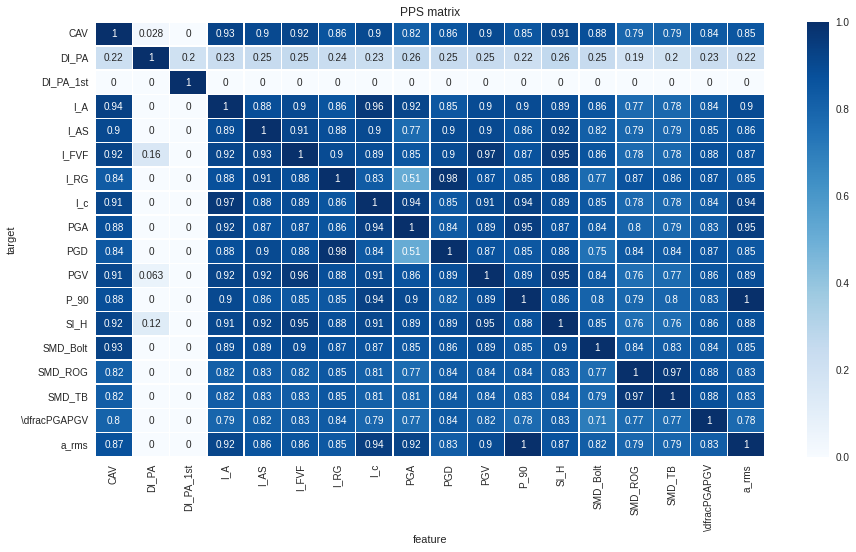

In [56]:
plt.figure(figsize = (15,8))
heatmap(matrix)

In [57]:
def corr_heatmap(df):
    ax = sns.heatmap(df, vmin=-1, vmax=1, linewidths=0.5, annot=True)
    ax.set_title("Correlation matrix")
    return ax

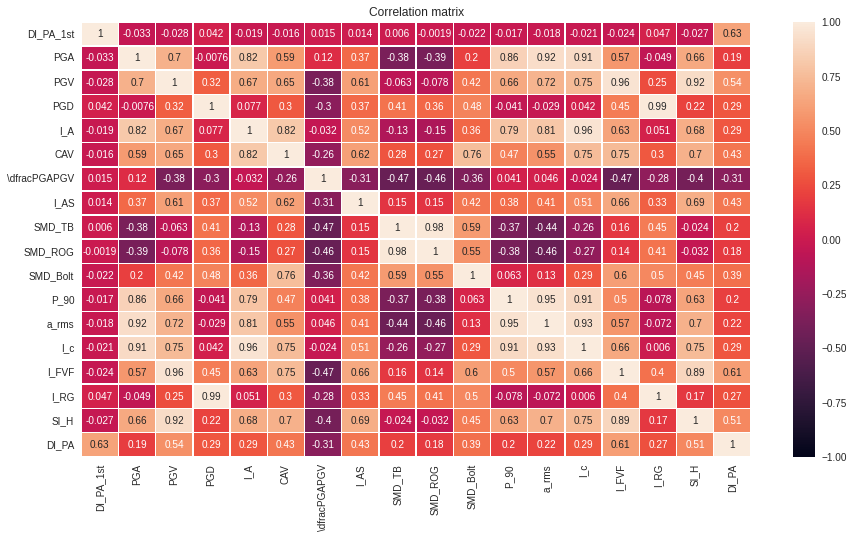

In [58]:
plt.figure(figsize = (15,8))
corr_heatmap(df.corr())

In [59]:
df.describe().T

count         mean  ...          75%         max
DI_PA_1st     2068.0     0.151765  ...     0.189500      1.4000
PGA           2068.0   299.613363  ...   404.982150   1465.1941
PGV           2068.0    29.057971  ...    41.002200    148.2002
PGD           2068.0    49.356819  ...    36.260300   1314.1946
I_A           2068.0   131.716306  ...   150.824300   1332.4398
CAV           2068.0   738.745689  ...   998.783700   3354.8361
\dfracPGAPGV  2068.0    13.037869  ...    16.234150     75.4563
I_AS          2068.0     3.369611  ...     4.264400     41.5173
SMD_TB        2068.0    13.506747  ...    17.760000     49.4600
SMD_ROG       2068.0    16.939006  ...    22.460000     56.8500
SMD_Bolt      2068.0    11.602781  ...    14.800000     58.5800
P_90          2068.0    15.800038  ...    16.901700    170.7462
a_rms         2068.0    76.421391  ...   102.786400    326.1669
I_c           2068.0  2267.113155  ...  2849.774300  13323.4297
I_FVF         2068.0    52.371034  ...    77.391975    243.0151
I_RG          2068.0   135.078940  ...    80.710600   4625.4625
SI_H          2068.0    90.364657  ...   130.936000    457.6864
DI_PA         2068.0     0.304343  ...     0.433500      1.4790

[18 rows x 8 columns]

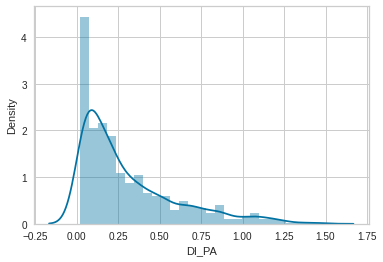

In [60]:
sns.distplot(df['DI_PA'])

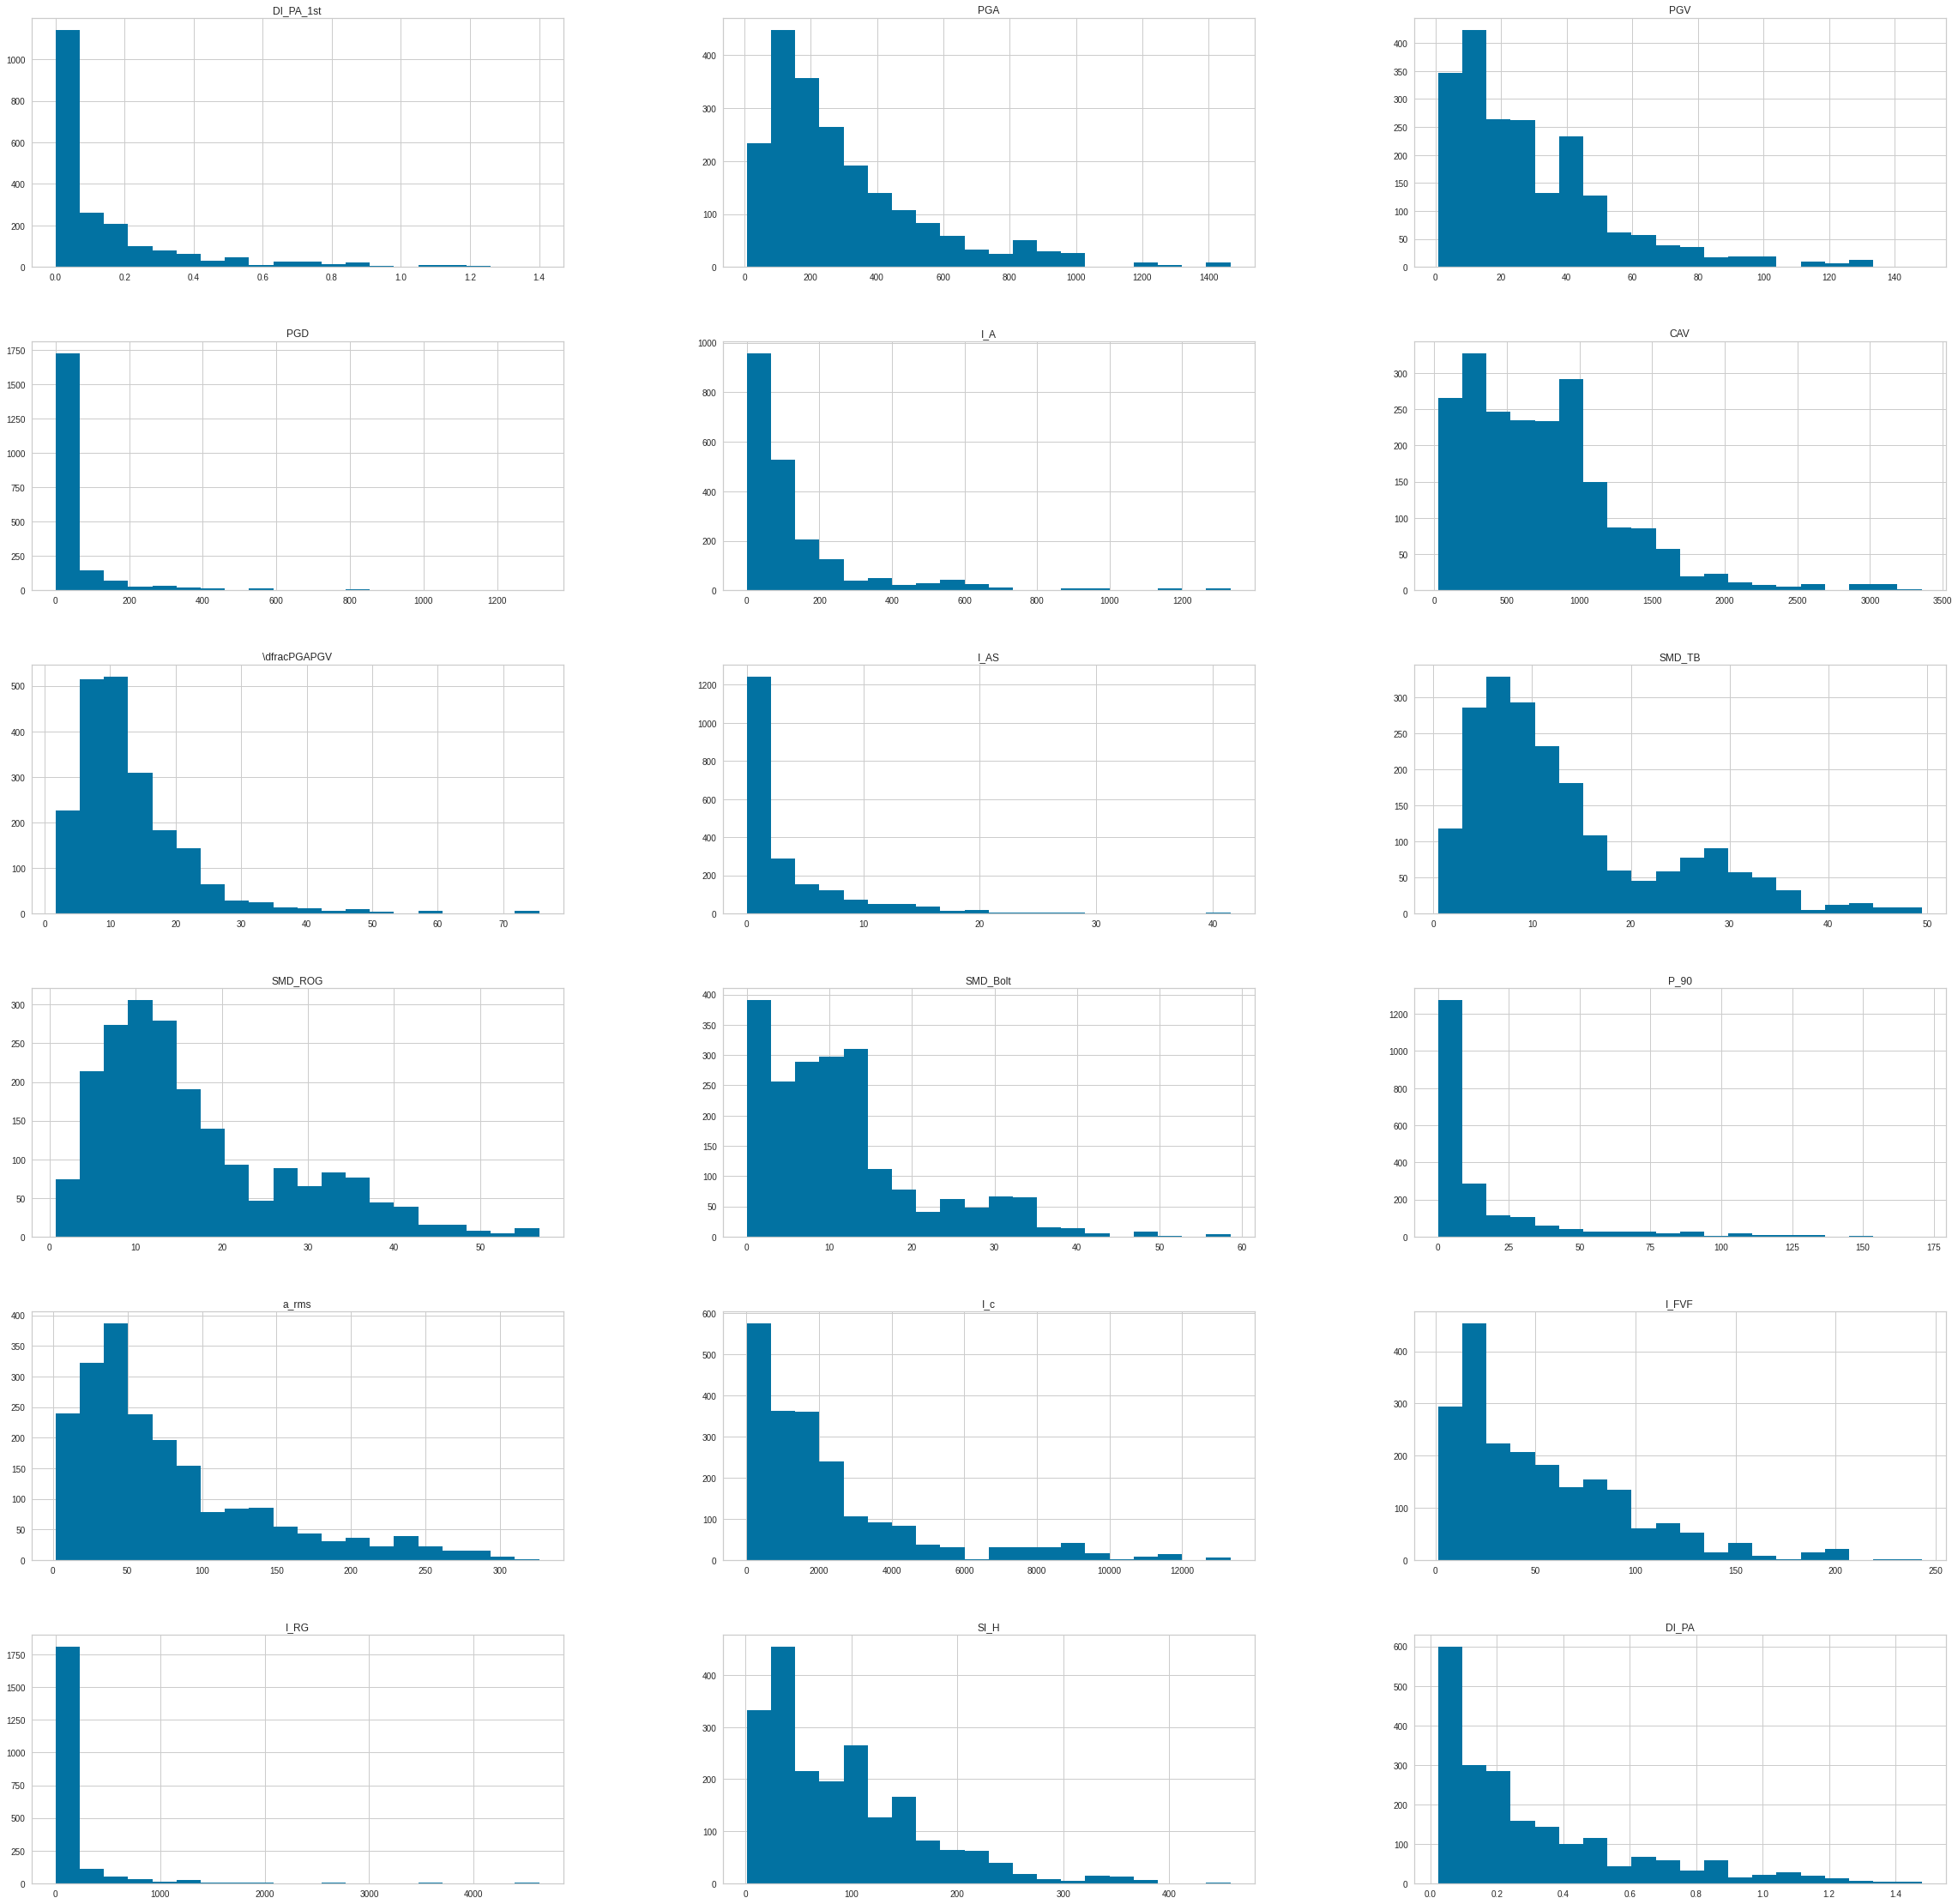

In [61]:
df.hist(bins=20, figsize=(40,40),layout=(6,3));

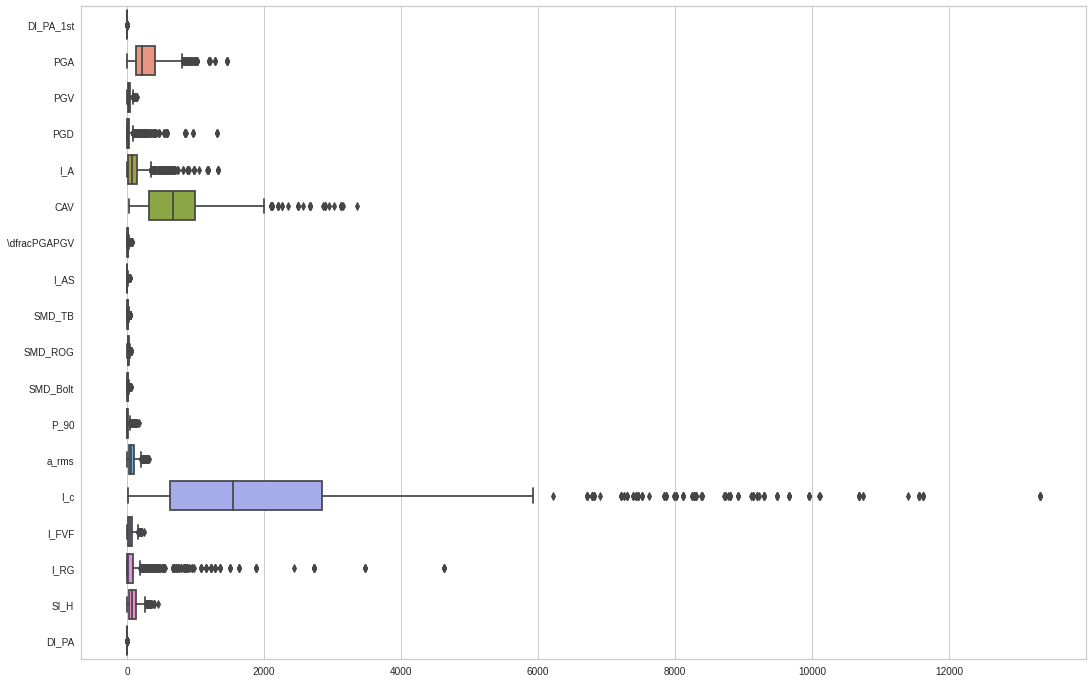

In [80]:
plt.figure(figsize=(18,12))
sns.boxplot(data=df, orient='h')

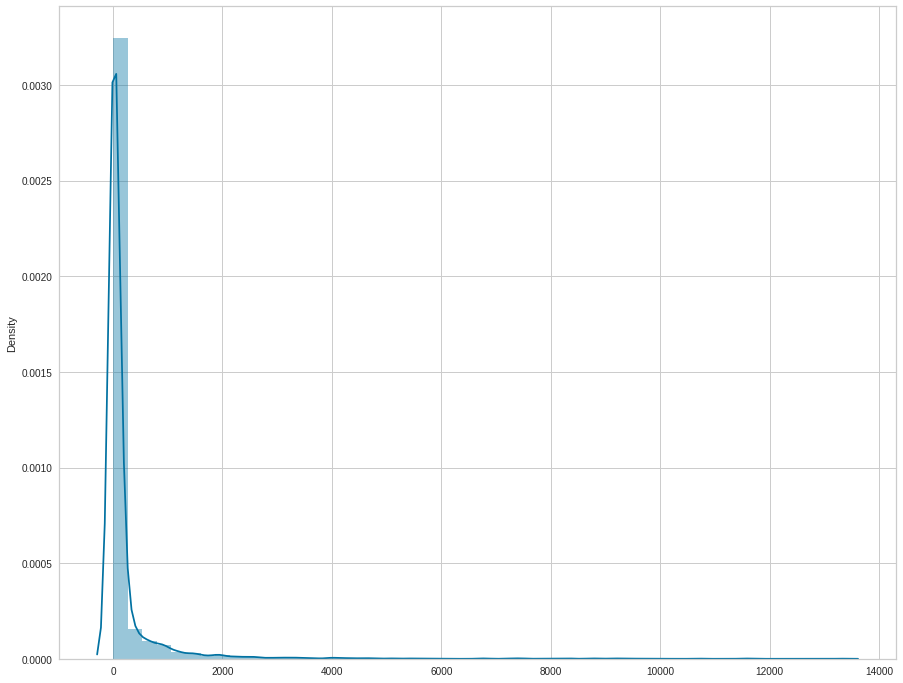

In [83]:
plt.figure(figsize=(15,12))
try:
    sns.distplot(df)
except RuntimeError as re:
    if str(re).startswith("Selected KDE bandwidth is 0. Cannot estimate density."):
        sns.distplot(df, kde_kws={'bw': 0.1})
    else:
        raise re

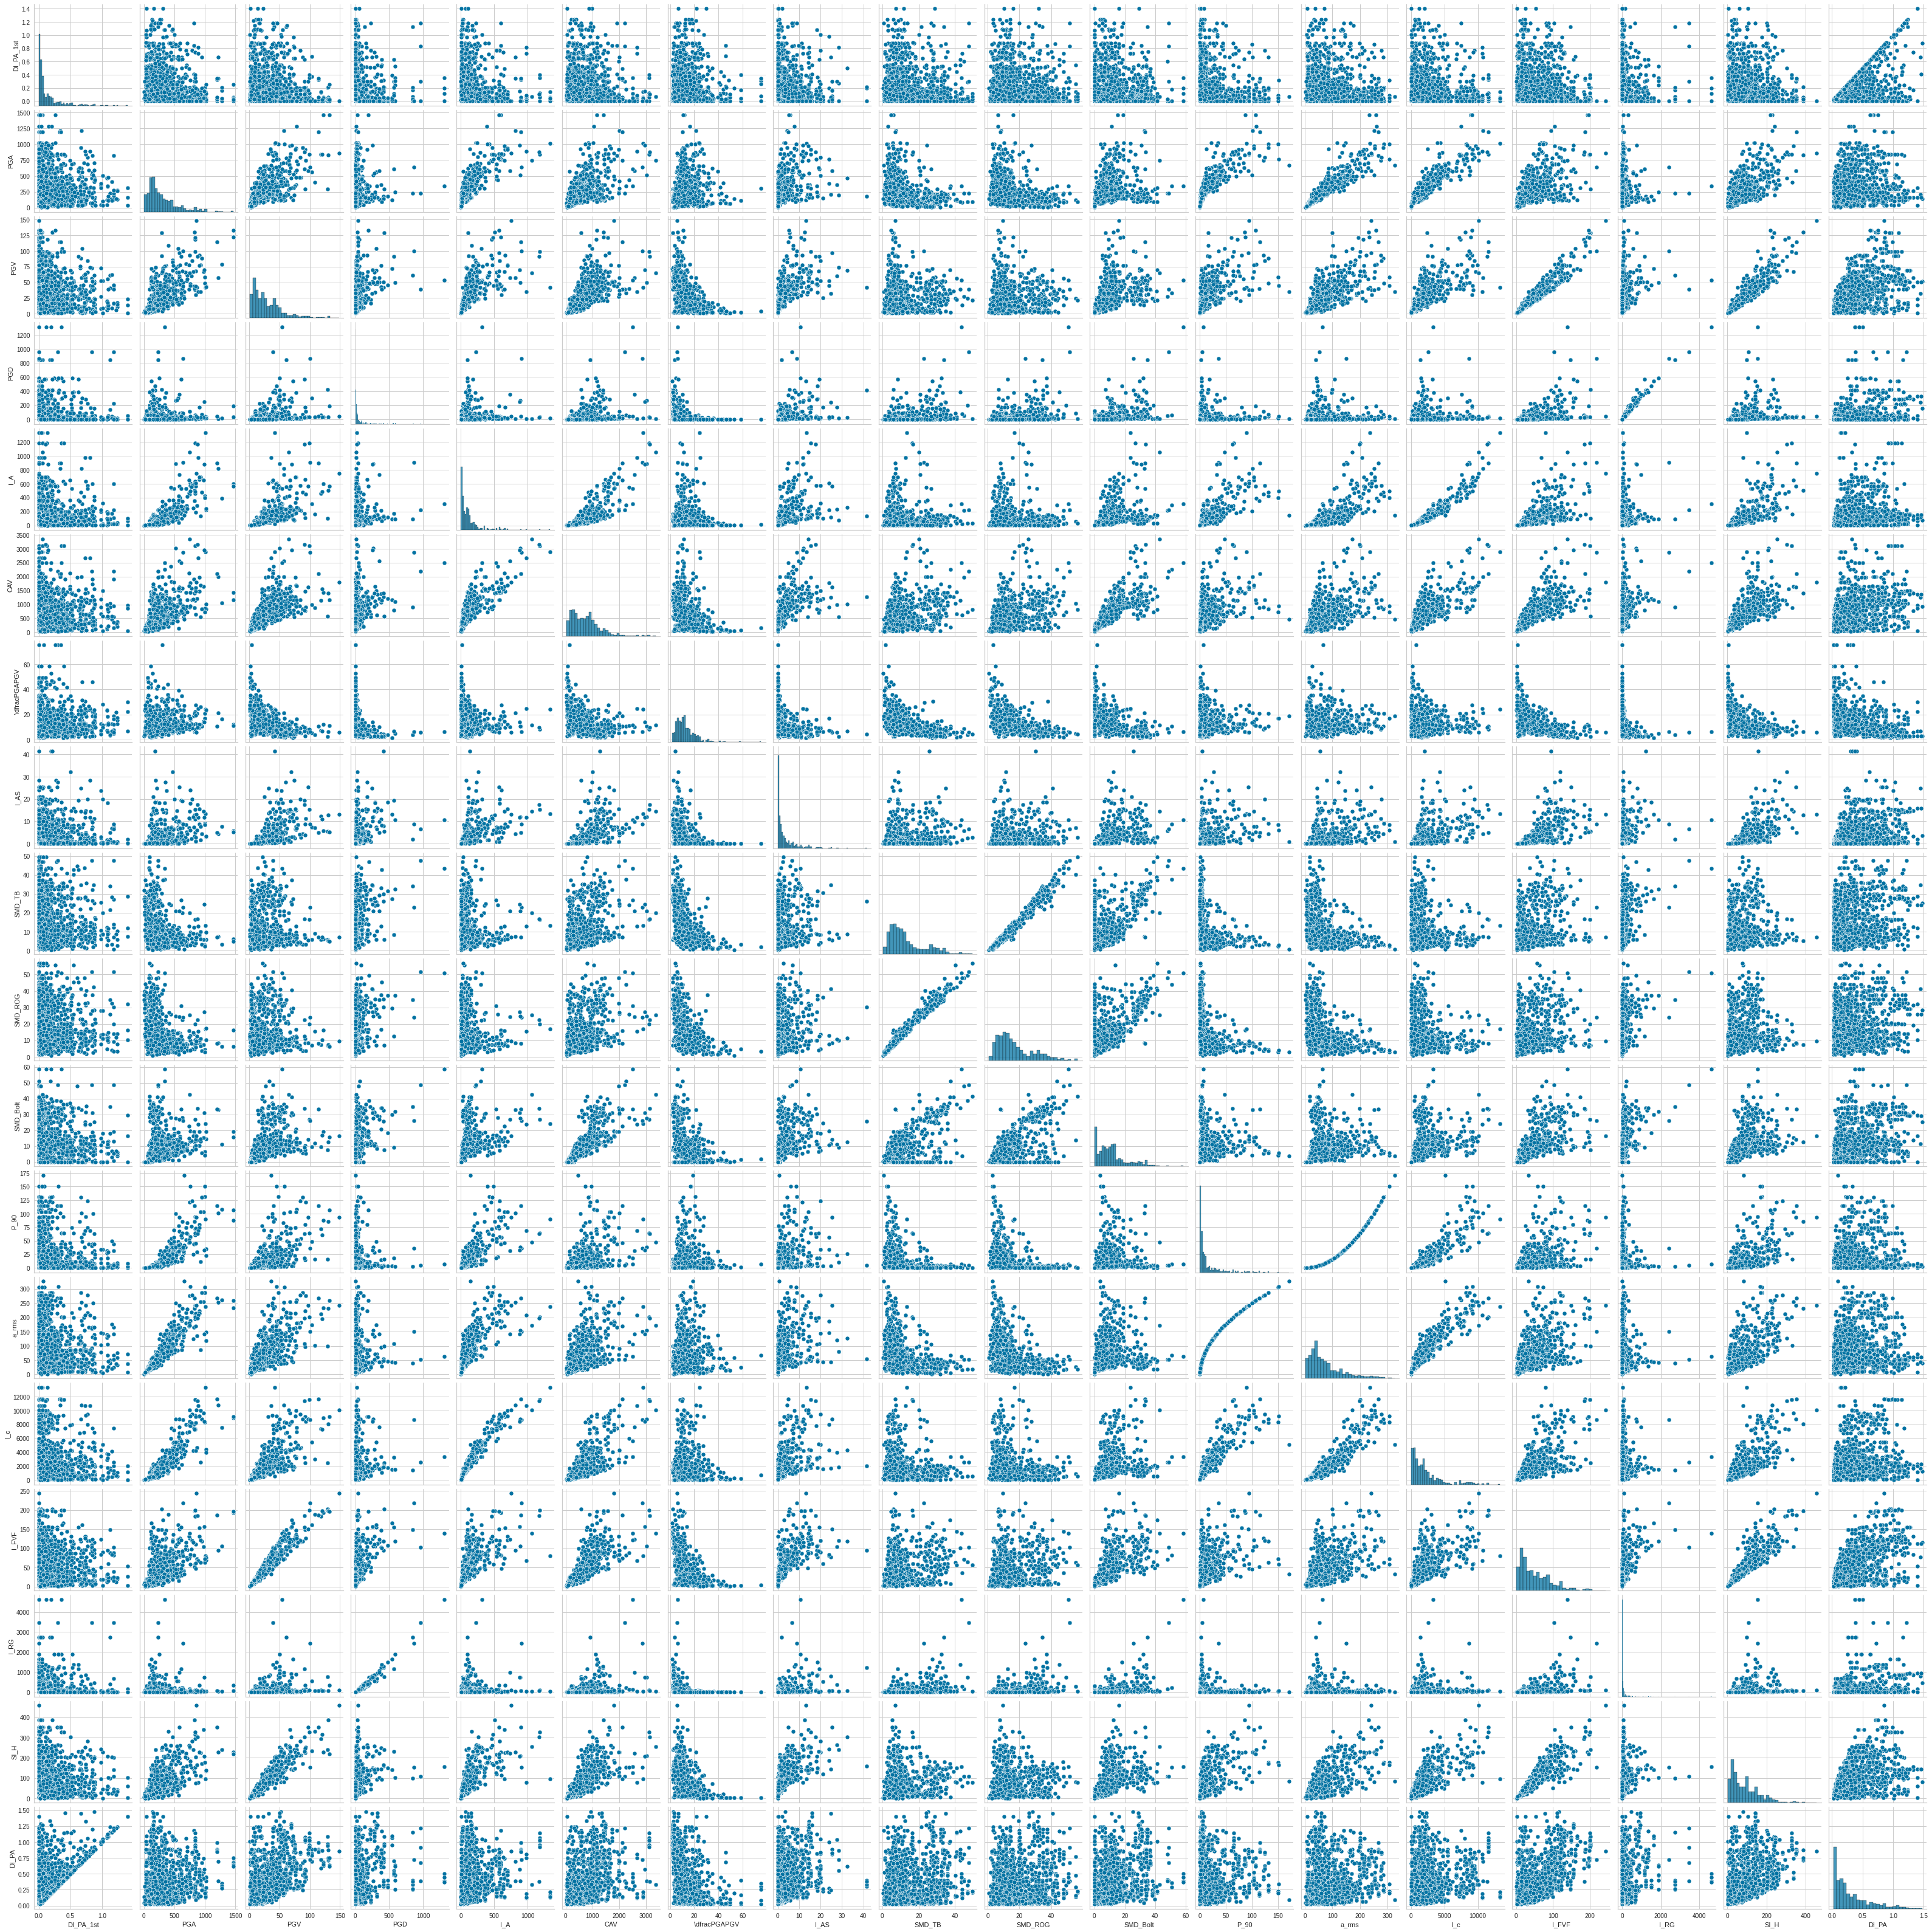

In [65]:
try:
    sns.pairplot(df)
except RuntimeError as re:
    if str(re).startswith("Selected KDE bandwidth is 0. Cannot estimate density."):
        sns.pair(df, kde_kws={'bw': 0.1})
    else:
        raise re

In [66]:
reg = setup(data = df, target=df.columns[-1], session_id=9, html=False, use_gpu=True, silent=True)

Setup Succesfully Completed!


Description             Value
0                               session_id                 9
1                                   Target             DI_PA
2                            Original Data        (2068, 18)
3                           Missing Values             False
4                         Numeric Features                17
5                     Categorical Features                 0
6                         Ordinal Features             False
7                High Cardinality Features             False
8                  High Cardinality Method              None
9                    Transformed Train Set        (1447, 17)
10                    Transformed Test Set         (621, 17)
11                      Shuffle Train-Test              True
12                     Stratify Train-Test             False
13                          Fold Generator             KFold
14                             Fold Number                10
15                                CPU Jobs                -1
16                                 Use GPU              True
17                          Log Experiment             False
18                         Experiment Name  reg-default-name
19                                     USI              87a7
20                         Imputation Type            simple
21          Iterative Imputation Iteration              None
22                         Numeric Imputer              mean
23      Iterative Imputation Numeric Model              None
24                     Categorical Imputer          constant
25  Iterative Imputation Categorical Model              None
26           Unknown Categoricals Handling    least_frequent
27                               Normalize             False
28                        Normalize Method              None
29                          Transformation             False
30                   Transformation Method              None
31                                     PCA             False
32                              PCA Method              None
33                          PCA Components              None
34                     Ignore Low Variance             False
35                     Combine Rare Levels             False
36                    Rare Level Threshold              None
37                         Numeric Binning             False
38                         Remove Outliers             False
39                      Outliers Threshold              None
40                Remove Multicollinearity             False
41             Multicollinearity Threshold              None
42             Remove Perfect Collinearity              True
43                              Clustering             False
44                    Clustering Iteration              None
45                     Polynomial Features             False
46                       Polynomial Degree              None
47                    Trignometry Features             False
48                    Polynomial Threshold              None
49                          Group Features             False
50                       Feature Selection             False
51                Feature Selection Method           classic
52            Features Selection Threshold              None
53                     Feature Interaction             False
54                           Feature Ratio             False
55                   Interaction Threshold              None
56                        Transform Target             False
57                 Transform Target Method           box-cox

In [67]:
compare_models()

Model     MAE     MSE    RMSE      R2   RMSLE   MAPE  TT (Sec)
lr  Linear Regression  0.0741  0.0136  0.1157  0.8336  0.0751  0.327     0.012

Model     MAE     MSE    RMSE      R2   RMSLE    MAPE  \
lr     Linear Regression  0.0741  0.0136  0.1157  0.8336  0.0751  0.3270   
lasso   Lasso Regression  0.1654  0.0519  0.2269  0.3624  0.1554  1.1363   

       TT (Sec)  
lr        0.012  
lasso     0.015

Model     MAE     MSE    RMSE      R2   RMSLE    MAPE  \
lr     Linear Regression  0.0741  0.0136  0.1157  0.8336  0.0751  0.3270   
ridge   Ridge Regression  0.0745  0.0136  0.1158  0.8335  0.0751  0.3302   
lasso   Lasso Regression  0.1654  0.0519  0.2269  0.3624  0.1554  1.1363   

       TT (Sec)  
lr        0.012  
ridge     0.017  
lasso     0.015

Model     MAE     MSE    RMSE      R2   RMSLE    MAPE  \
lr     Linear Regression  0.0741  0.0136  0.1157  0.8336  0.0751  0.3270   
ridge   Ridge Regression  0.0745  0.0136  0.1158  0.8335  0.0751  0.3302   
en           Elastic Net  0.1614  0.0506  0.2241  0.3773  0.1539  1.0972   
lasso   Lasso Regression  0.1654  0.0519  0.2269  0.3624  0.1554  1.1363   

       TT (Sec)  
lr        0.012  
ridge     0.017  
en        0.015  
lasso     0.015

Model     MAE     MSE    RMSE      R2   RMSLE    MAPE  \
lr          Linear Regression  0.0741  0.0136  0.1157  0.8336  0.0751  0.3270   
ridge        Ridge Regression  0.0745  0.0136  0.1158  0.8335  0.0751  0.3302   
en                Elastic Net  0.1614  0.0506  0.2241  0.3773  0.1539  1.0972   
lasso        Lasso Regression  0.1654  0.0519  0.2269  0.3624  0.1554  1.1363   
lar    Least Angle Regression  0.2446  0.1653  0.3378 -1.1292  0.1852  1.7651   

       TT (Sec)  
lr        0.012  
ridge     0.017  
en        0.015  
lasso     0.015  
lar       0.018

Model     MAE     MSE    RMSE      R2   RMSLE  \
lr                Linear Regression  0.0741  0.0136  0.1157  0.8336  0.0751   
ridge              Ridge Regression  0.0745  0.0136  0.1158  0.8335  0.0751   
en                      Elastic Net  0.1614  0.0506  0.2241  0.3773  0.1539   
lasso              Lasso Regression  0.1654  0.0519  0.2269  0.3624  0.1554   
llar   Lasso Least Angle Regression  0.2238  0.0816  0.2851 -0.0049  0.1987   
lar          Least Angle Regression  0.2446  0.1653  0.3378 -1.1292  0.1852   

         MAPE  TT (Sec)  
lr     0.3270     0.012  
ridge  0.3302     0.017  
en     1.0972     0.015  
lasso  1.1363     0.015  
llar   1.9384     0.012  
lar    1.7651     0.018

Model     MAE     MSE    RMSE      R2   RMSLE  \
lr                Linear Regression  0.0741  0.0136  0.1157  0.8336  0.0751   
ridge              Ridge Regression  0.0745  0.0136  0.1158  0.8335  0.0751   
omp     Orthogonal Matching Pursuit  0.1552  0.0485  0.2193  0.4033  0.1538   
en                      Elastic Net  0.1614  0.0506  0.2241  0.3773  0.1539   
lasso              Lasso Regression  0.1654  0.0519  0.2269  0.3624  0.1554   
llar   Lasso Least Angle Regression  0.2238  0.0816  0.2851 -0.0049  0.1987   
lar          Least Angle Regression  0.2446  0.1653  0.3378 -1.1292  0.1852   

         MAPE  TT (Sec)  
lr     0.3270     0.012  
ridge  0.3302     0.017  
omp    1.2169     0.026  
en     1.0972     0.015  
lasso  1.1363     0.015  
llar   1.9384     0.012  
lar    1.7651     0.018

Model     MAE     MSE    RMSE      R2   RMSLE  \
lr                Linear Regression  0.0741  0.0136  0.1157  0.8336  0.0751   
br                   Bayesian Ridge  0.0742  0.0136  0.1158  0.8336  0.0751   
ridge              Ridge Regression  0.0745  0.0136  0.1158  0.8335  0.0751   
omp     Orthogonal Matching Pursuit  0.1552  0.0485  0.2193  0.4033  0.1538   
en                      Elastic Net  0.1614  0.0506  0.2241  0.3773  0.1539   
lasso              Lasso Regression  0.1654  0.0519  0.2269  0.3624  0.1554   
llar   Lasso Least Angle Regression  0.2238  0.0816  0.2851 -0.0049  0.1987   
lar          Least Angle Regression  0.2446  0.1653  0.3378 -1.1292  0.1852   

         MAPE  TT (Sec)  
lr     0.3270     0.012  
br     0.3279     0.046  
ridge  0.3302     0.017  
omp    1.2169     0.026  
en     1.0972     0.015  
lasso  1.1363     0.015  
llar   1.9384     0.012  
lar    1.7651     0.018

Model     MAE     MSE    RMSE      R2   RMSLE  \
lr                Linear Regression  0.0741  0.0136  0.1157  0.8336  0.0751   
br                   Bayesian Ridge  0.0742  0.0136  0.1158  0.8336  0.0751   
ridge              Ridge Regression  0.0745  0.0136  0.1158  0.8335  0.0751   
omp     Orthogonal Matching Pursuit  0.1552  0.0485  0.2193  0.4033  0.1538   
en                      Elastic Net  0.1614  0.0506  0.2241  0.3773  0.1539   
lasso              Lasso Regression  0.1654  0.0519  0.2269  0.3624  0.1554   
llar   Lasso Least Angle Regression  0.2238  0.0816  0.2851 -0.0049  0.1987   
lar          Least Angle Regression  0.2446  0.1653  0.3378 -1.1292  0.1852   
par    Passive Aggressive Regressor  0.3094  0.2440  0.4561 -2.1455  0.2422   

         MAPE  TT (Sec)  
lr     0.3270     0.012  
br     0.3279     0.046  
ridge  0.3302     0.017  
omp    1.2169     0.026  
en     1.0972     0.015  
lasso  1.1363     0.015  
llar   1.9384     0.012  
lar    1.7651     0.018  
par    1.6137     0.020

Model     MAE     MSE    RMSE      R2   RMSLE  \
lr                Linear Regression  0.0741  0.0136  0.1157  0.8336  0.0751   
br                   Bayesian Ridge  0.0742  0.0136  0.1158  0.8336  0.0751   
ridge              Ridge Regression  0.0745  0.0136  0.1158  0.8335  0.0751   
omp     Orthogonal Matching Pursuit  0.1552  0.0485  0.2193  0.4033  0.1538   
en                      Elastic Net  0.1614  0.0506  0.2241  0.3773  0.1539   
lasso              Lasso Regression  0.1654  0.0519  0.2269  0.3624  0.1554   
huber               Huber Regressor  0.1756  0.0601  0.2439  0.2589  0.1684   
llar   Lasso Least Angle Regression  0.2238  0.0816  0.2851 -0.0049  0.1987   
lar          Least Angle Regression  0.2446  0.1653  0.3378 -1.1292  0.1852   
par    Passive Aggressive Regressor  0.3094  0.2440  0.4561 -2.1455  0.2422   

         MAPE  TT (Sec)  
lr     0.3270     0.012  
br     0.3279     0.046  
ridge  0.3302     0.017  
omp    1.2169     0.026  
en     1.0972     0.015  
lasso  1.1363     0.015  
huber  1.3570     0.283  
llar   1.9384     0.012  
lar    1.7651     0.018  
par    1.6137     0.020

Model     MAE     MSE    RMSE      R2   RMSLE  \
lr                Linear Regression  0.0741  0.0136  0.1157  0.8336  0.0751   
br                   Bayesian Ridge  0.0742  0.0136  0.1158  0.8336  0.0751   
ridge              Ridge Regression  0.0745  0.0136  0.1158  0.8335  0.0751   
omp     Orthogonal Matching Pursuit  0.1552  0.0485  0.2193  0.4033  0.1538   
en                      Elastic Net  0.1614  0.0506  0.2241  0.3773  0.1539   
lasso              Lasso Regression  0.1654  0.0519  0.2269  0.3624  0.1554   
knn           K Neighbors Regressor  0.1593  0.0567  0.2372  0.2982  0.1642   
huber               Huber Regressor  0.1756  0.0601  0.2439  0.2589  0.1684   
llar   Lasso Least Angle Regression  0.2238  0.0816  0.2851 -0.0049  0.1987   
lar          Least Angle Regression  0.2446  0.1653  0.3378 -1.1292  0.1852   
par    Passive Aggressive Regressor  0.3094  0.2440  0.4561 -2.1455  0.2422   

         MAPE  TT (Sec)  
lr     0.3270     0.012  
br     0.3279     0.046  
ridge  0.3302     0.017  
omp    1.2169     0.026  
en     1.0972     0.015  
lasso  1.1363     0.015  
knn    1.1031     0.259  
huber  1.3570     0.283  
llar   1.9384     0.012  
lar    1.7651     0.018  
par    1.6137     0.020

Model     MAE     MSE    RMSE      R2   RMSLE  \
dt          Decision Tree Regressor  0.0395  0.0078  0.0880  0.9029  0.0528   
lr                Linear Regression  0.0741  0.0136  0.1157  0.8336  0.0751   
br                   Bayesian Ridge  0.0742  0.0136  0.1158  0.8336  0.0751   
ridge              Ridge Regression  0.0745  0.0136  0.1158  0.8335  0.0751   
omp     Orthogonal Matching Pursuit  0.1552  0.0485  0.2193  0.4033  0.1538   
en                      Elastic Net  0.1614  0.0506  0.2241  0.3773  0.1539   
lasso              Lasso Regression  0.1654  0.0519  0.2269  0.3624  0.1554   
knn           K Neighbors Regressor  0.1593  0.0567  0.2372  0.2982  0.1642   
huber               Huber Regressor  0.1756  0.0601  0.2439  0.2589  0.1684   
llar   Lasso Least Angle Regression  0.2238  0.0816  0.2851 -0.0049  0.1987   
lar          Least Angle Regression  0.2446  0.1653  0.3378 -1.1292  0.1852   
par    Passive Aggressive Regressor  0.3094  0.2440  0.4561 -2.1455  0.2422   

         MAPE  TT (Sec)  
dt     0.1273     0.042  
lr     0.3270     0.012  
br     0.3279     0.046  
ridge  0.3302     0.017  
omp    1.2169     0.026  
en     1.0972     0.015  
lasso  1.1363     0.015  
knn    1.1031     0.259  
huber  1.3570     0.283  
llar   1.9384     0.012  
lar    1.7651     0.018  
par    1.6137     0.020

Model     MAE     MSE    RMSE      R2   RMSLE  \
rf          Random Forest Regressor  0.0317  0.0045  0.0656  0.9439  0.0402   
dt          Decision Tree Regressor  0.0395  0.0078  0.0880  0.9029  0.0528   
lr                Linear Regression  0.0741  0.0136  0.1157  0.8336  0.0751   
br                   Bayesian Ridge  0.0742  0.0136  0.1158  0.8336  0.0751   
ridge              Ridge Regression  0.0745  0.0136  0.1158  0.8335  0.0751   
omp     Orthogonal Matching Pursuit  0.1552  0.0485  0.2193  0.4033  0.1538   
en                      Elastic Net  0.1614  0.0506  0.2241  0.3773  0.1539   
lasso              Lasso Regression  0.1654  0.0519  0.2269  0.3624  0.1554   
knn           K Neighbors Regressor  0.1593  0.0567  0.2372  0.2982  0.1642   
huber               Huber Regressor  0.1756  0.0601  0.2439  0.2589  0.1684   
llar   Lasso Least Angle Regression  0.2238  0.0816  0.2851 -0.0049  0.1987   
lar          Least Angle Regression  0.2446  0.1653  0.3378 -1.1292  0.1852   
par    Passive Aggressive Regressor  0.3094  0.2440  0.4561 -2.1455  0.2422   

         MAPE  TT (Sec)  
rf     0.1063     2.509  
dt     0.1273     0.042  
lr     0.3270     0.012  
br     0.3279     0.046  
ridge  0.3302     0.017  
omp    1.2169     0.026  
en     1.0972     0.015  
lasso  1.1363     0.015  
knn    1.1031     0.259  
huber  1.3570     0.283  
llar   1.9384     0.012  
lar    1.7651     0.018  
par    1.6137     0.020

Model     MAE     MSE    RMSE      R2   RMSLE  \
et            Extra Trees Regressor  0.0275  0.0038  0.0599  0.9530  0.0366   
rf          Random Forest Regressor  0.0317  0.0045  0.0656  0.9439  0.0402   
dt          Decision Tree Regressor  0.0395  0.0078  0.0880  0.9029  0.0528   
lr                Linear Regression  0.0741  0.0136  0.1157  0.8336  0.0751   
br                   Bayesian Ridge  0.0742  0.0136  0.1158  0.8336  0.0751   
ridge              Ridge Regression  0.0745  0.0136  0.1158  0.8335  0.0751   
omp     Orthogonal Matching Pursuit  0.1552  0.0485  0.2193  0.4033  0.1538   
en                      Elastic Net  0.1614  0.0506  0.2241  0.3773  0.1539   
lasso              Lasso Regression  0.1654  0.0519  0.2269  0.3624  0.1554   
knn           K Neighbors Regressor  0.1593  0.0567  0.2372  0.2982  0.1642   
huber               Huber Regressor  0.1756  0.0601  0.2439  0.2589  0.1684   
llar   Lasso Least Angle Regression  0.2238  0.0816  0.2851 -0.0049  0.1987   
lar          Least Angle Regression  0.2446  0.1653  0.3378 -1.1292  0.1852   
par    Passive Aggressive Regressor  0.3094  0.2440  0.4561 -2.1455  0.2422   

         MAPE  TT (Sec)  
et     0.0947     1.253  
rf     0.1063     2.509  
dt     0.1273     0.042  
lr     0.3270     0.012  
br     0.3279     0.046  
ridge  0.3302     0.017  
omp    1.2169     0.026  
en     1.0972     0.015  
lasso  1.1363     0.015  
knn    1.1031     0.259  
huber  1.3570     0.283  
llar   1.9384     0.012  
lar    1.7651     0.018  
par    1.6137     0.020

Model     MAE     MSE    RMSE      R2   RMSLE  \
et            Extra Trees Regressor  0.0275  0.0038  0.0599  0.9530  0.0366   
rf          Random Forest Regressor  0.0317  0.0045  0.0656  0.9439  0.0402   
dt          Decision Tree Regressor  0.0395  0.0078  0.0880  0.9029  0.0528   
lr                Linear Regression  0.0741  0.0136  0.1157  0.8336  0.0751   
br                   Bayesian Ridge  0.0742  0.0136  0.1158  0.8336  0.0751   
ridge              Ridge Regression  0.0745  0.0136  0.1158  0.8335  0.0751   
ada              AdaBoost Regressor  0.1236  0.0205  0.1429  0.7455  0.1099   
omp     Orthogonal Matching Pursuit  0.1552  0.0485  0.2193  0.4033  0.1538   
en                      Elastic Net  0.1614  0.0506  0.2241  0.3773  0.1539   
lasso              Lasso Regression  0.1654  0.0519  0.2269  0.3624  0.1554   
knn           K Neighbors Regressor  0.1593  0.0567  0.2372  0.2982  0.1642   
huber               Huber Regressor  0.1756  0.0601  0.2439  0.2589  0.1684   
llar   Lasso Least Angle Regression  0.2238  0.0816  0.2851 -0.0049  0.1987   
lar          Least Angle Regression  0.2446  0.1653  0.3378 -1.1292  0.1852   
par    Passive Aggressive Regressor  0.3094  0.2440  0.4561 -2.1455  0.2422   

         MAPE  TT (Sec)  
et     0.0947     1.253  
rf     0.1063     2.509  
dt     0.1273     0.042  
lr     0.3270     0.012  
br     0.3279     0.046  
ridge  0.3302     0.017  
ada    1.3156     0.229  
omp    1.2169     0.026  
en     1.0972     0.015  
lasso  1.1363     0.015  
knn    1.1031     0.259  
huber  1.3570     0.283  
llar   1.9384     0.012  
lar    1.7651     0.018  
par    1.6137     0.020

Model     MAE     MSE    RMSE      R2   RMSLE  \
et            Extra Trees Regressor  0.0275  0.0038  0.0599  0.9530  0.0366   
rf          Random Forest Regressor  0.0317  0.0045  0.0656  0.9439  0.0402   
gbr     Gradient Boosting Regressor  0.0411  0.0058  0.0750  0.9278  0.0474   
dt          Decision Tree Regressor  0.0395  0.0078  0.0880  0.9029  0.0528   
lr                Linear Regression  0.0741  0.0136  0.1157  0.8336  0.0751   
br                   Bayesian Ridge  0.0742  0.0136  0.1158  0.8336  0.0751   
ridge              Ridge Regression  0.0745  0.0136  0.1158  0.8335  0.0751   
ada              AdaBoost Regressor  0.1236  0.0205  0.1429  0.7455  0.1099   
omp     Orthogonal Matching Pursuit  0.1552  0.0485  0.2193  0.4033  0.1538   
en                      Elastic Net  0.1614  0.0506  0.2241  0.3773  0.1539   
lasso              Lasso Regression  0.1654  0.0519  0.2269  0.3624  0.1554   
knn           K Neighbors Regressor  0.1593  0.0567  0.2372  0.2982  0.1642   
huber               Huber Regressor  0.1756  0.0601  0.2439  0.2589  0.1684   
llar   Lasso Least Angle Regression  0.2238  0.0816  0.2851 -0.0049  0.1987   
lar          Least Angle Regression  0.2446  0.1653  0.3378 -1.1292  0.1852   
par    Passive Aggressive Regressor  0.3094  0.2440  0.4561 -2.1455  0.2422   

         MAPE  TT (Sec)  
et     0.0947     1.253  
rf     0.1063     2.509  
gbr    0.1748     0.484  
dt     0.1273     0.042  
lr     0.3270     0.012  
br     0.3279     0.046  
ridge  0.3302     0.017  
ada    1.3156     0.229  
omp    1.2169     0.026  
en     1.0972     0.015  
lasso  1.1363     0.015  
knn    1.1031     0.259  
huber  1.3570     0.283  
llar   1.9384     0.012  
lar    1.7651     0.018  
par    1.6137     0.020

Model     MAE     MSE    RMSE      R2  \
et                  Extra Trees Regressor  0.0275  0.0038  0.0599  0.9530   
rf                Random Forest Regressor  0.0317  0.0045  0.0656  0.9439   
lightgbm  Light Gradient Boosting Machine  0.0336  0.0048  0.0680  0.9400   
gbr           Gradient Boosting Regressor  0.0411  0.0058  0.0750  0.9278   
dt                Decision Tree Regressor  0.0395  0.0078  0.0880  0.9029   
lr                      Linear Regression  0.0741  0.0136  0.1157  0.8336   
br                         Bayesian Ridge  0.0742  0.0136  0.1158  0.8336   
ridge                    Ridge Regression  0.0745  0.0136  0.1158  0.8335   
ada                    AdaBoost Regressor  0.1236  0.0205  0.1429  0.7455   
omp           Orthogonal Matching Pursuit  0.1552  0.0485  0.2193  0.4033   
en                            Elastic Net  0.1614  0.0506  0.2241  0.3773   
lasso                    Lasso Regression  0.1654  0.0519  0.2269  0.3624   
knn                 K Neighbors Regressor  0.1593  0.0567  0.2372  0.2982   
huber                     Huber Regressor  0.1756  0.0601  0.2439  0.2589   
llar         Lasso Least Angle Regression  0.2238  0.0816  0.2851 -0.0049   
lar                Least Angle Regression  0.2446  0.1653  0.3378 -1.1292   
par          Passive Aggressive Regressor  0.3094  0.2440  0.4561 -2.1455   

           RMSLE    MAPE  TT (Sec)  
et        0.0366  0.0947     1.253  
rf        0.0402  0.1063     2.509  
lightgbm  0.0411  0.1168     0.552  
gbr       0.0474  0.1748     0.484  
dt        0.0528  0.1273     0.042  
lr        0.0751  0.3270     0.012  
br        0.0751  0.3279     0.046  
ridge     0.0751  0.3302     0.017  
ada       0.1099  1.3156     0.229  
omp       0.1538  1.2169     0.026  
en        0.1539  1.0972     0.015  
lasso     0.1554  1.1363     0.015  
knn       0.1642  1.1031     0.259  
huber     0.1684  1.3570     0.283  
llar      0.1987  1.9384     0.012  
lar       0.1852  1.7651     0.018  
par       0.2422  1.6137     0.020

Model     MAE     MSE    RMSE      R2  \
et                  Extra Trees Regressor  0.0275  0.0038  0.0599  0.9530   
rf                Random Forest Regressor  0.0317  0.0045  0.0656  0.9439   
lightgbm  Light Gradient Boosting Machine  0.0336  0.0048  0.0680  0.9400   
gbr           Gradient Boosting Regressor  0.0411  0.0058  0.0750  0.9278   
dt                Decision Tree Regressor  0.0395  0.0078  0.0880  0.9029   
lr                      Linear Regression  0.0741  0.0136  0.1157  0.8336   
br                         Bayesian Ridge  0.0742  0.0136  0.1158  0.8336   
ridge                    Ridge Regression  0.0745  0.0136  0.1158  0.8335   
ada                    AdaBoost Regressor  0.1236  0.0205  0.1429  0.7455   
omp           Orthogonal Matching Pursuit  0.1552  0.0485  0.2193  0.4033   
en                            Elastic Net  0.1614  0.0506  0.2241  0.3773   
lasso                    Lasso Regression  0.1654  0.0519  0.2269  0.3624   
knn                 K Neighbors Regressor  0.1593  0.0567  0.2372  0.2982   
huber                     Huber Regressor  0.1756  0.0601  0.2439  0.2589   
llar         Lasso Least Angle Regression  0.2238  0.0816  0.2851 -0.0049   
dummy                     Dummy Regressor  0.2238  0.0816  0.2851 -0.0049   
lar                Least Angle Regression  0.2446  0.1653  0.3378 -1.1292   
par          Passive Aggressive Regressor  0.3094  0.2440  0.4561 -2.1455   

           RMSLE    MAPE  TT (Sec)  
et        0.0366  0.0947     1.253  
rf        0.0402  0.1063     2.509  
lightgbm  0.0411  0.1168     0.552  
gbr       0.0474  0.1748     0.484  
dt        0.0528  0.1273     0.042  
lr        0.0751  0.3270     0.012  
br        0.0751  0.3279     0.046  
ridge     0.0751  0.3302     0.017  
ada       0.1099  1.3156     0.229  
omp       0.1538  1.2169     0.026  
en        0.1539  1.0972     0.015  
lasso     0.1554  1.1363     0.015  
knn       0.1642  1.1031     0.259  
huber     0.1684  1.3570     0.283  
llar      0.1987  1.9384     0.012  
dummy     0.1987  1.9384     0.005  
lar       0.1852  1.7651     0.018  
par       0.2422  1.6137     0.020

Model     MAE     MSE    RMSE      R2  \
et                  Extra Trees Regressor  0.0275  0.0038  0.0599  0.9530   
rf                Random Forest Regressor  0.0317  0.0045  0.0656  0.9439   
lightgbm  Light Gradient Boosting Machine  0.0336  0.0048  0.0680  0.9400   
gbr           Gradient Boosting Regressor  0.0411  0.0058  0.0750  0.9278   
dt                Decision Tree Regressor  0.0395  0.0078  0.0880  0.9029   
lr                      Linear Regression  0.0741  0.0136  0.1157  0.8336   
br                         Bayesian Ridge  0.0742  0.0136  0.1158  0.8336   
ridge                    Ridge Regression  0.0745  0.0136  0.1158  0.8335   
ada                    AdaBoost Regressor  0.1236  0.0205  0.1429  0.7455   
omp           Orthogonal Matching Pursuit  0.1552  0.0485  0.2193  0.4033   
en                            Elastic Net  0.1614  0.0506  0.2241  0.3773   
lasso                    Lasso Regression  0.1654  0.0519  0.2269  0.3624   
knn                 K Neighbors Regressor  0.1593  0.0567  0.2372  0.2982   
huber                     Huber Regressor  0.1756  0.0601  0.2439  0.2589   
llar         Lasso Least Angle Regression  0.2238  0.0816  0.2851 -0.0049   
dummy                     Dummy Regressor  0.2238  0.0816  0.2851 -0.0049   
lar                Least Angle Regression  0.2446  0.1653  0.3378 -1.1292   
par          Passive Aggressive Regressor  0.3094  0.2440  0.4561 -2.1455   

           RMSLE    MAPE  TT (Sec)  
et        0.0366  0.0947     1.253  
rf        0.0402  0.1063     2.509  
lightgbm  0.0411  0.1168     0.552  
gbr       0.0474  0.1748     0.484  
dt        0.0528  0.1273     0.042  
lr        0.0751  0.3270     0.012  
br        0.0751  0.3279     0.046  
ridge     0.0751  0.3302     0.017  
ada       0.1099  1.3156     0.229  
omp       0.1538  1.2169     0.026  
en        0.1539  1.0972     0.015  
lasso     0.1554  1.1363     0.015  
knn       0.1642  1.1031     0.259  
huber     0.1684  1.3570     0.283  
llar      0.1987  1.9384     0.012  
dummy     0.1987  1.9384     0.005  
lar       0.1852  1.7651     0.018  
par       0.2422  1.6137     0.020

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=9, verbose=0, warm_start=False)

In [68]:
best = create_model("et", fold=5)

MAE     MSE    RMSE      R2   RMSLE    MAPE
0     0.0218  0.0017  0.0411  0.9783  0.0257  0.0906
1     0.0310  0.0050  0.0704  0.9412  0.0413  0.1011
2     0.0272  0.0024  0.0492  0.9738  0.0327  0.0969
3     0.0281  0.0066  0.0810  0.9081  0.0456  0.0957
4     0.0254  0.0024  0.0495  0.9615  0.0340  0.1004
5     0.0331  0.0049  0.0703  0.9486  0.0408  0.0936
6     0.0284  0.0059  0.0766  0.9223  0.0442  0.1035
7     0.0225  0.0023  0.0483  0.9695  0.0300  0.0754
8     0.0269  0.0033  0.0578  0.9621  0.0367  0.0920
9     0.0309  0.0030  0.0551  0.9645  0.0347  0.0974
Mean  0.0275  0.0038  0.0599  0.9530  0.0366  0.0947
SD    0.0034  0.0016  0.0130  0.0218  0.0061  0.0075

In [69]:
tuned_model = tune_model(best)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   47.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.9min finished


MAE     MSE    RMSE      R2   RMSLE    MAPE
0     0.0680  0.0111  0.1053  0.8579  0.0671  0.3427
1     0.0867  0.0177  0.1331  0.7899  0.0825  0.3828
2     0.0882  0.0175  0.1324  0.8107  0.0826  0.3629
3     0.0737  0.0164  0.1280  0.7703  0.0786  0.3536
4     0.0688  0.0103  0.1013  0.8388  0.0675  0.3163
5     0.0814  0.0165  0.1283  0.8285  0.0786  0.3378
6     0.0749  0.0161  0.1269  0.7869  0.0783  0.3821
7     0.0798  0.0133  0.1153  0.8262  0.0756  0.4053
8     0.0862  0.0171  0.1307  0.8063  0.0823  0.3829
9     0.0837  0.0144  0.1200  0.8318  0.0761  0.3202
Mean  0.0791  0.0150  0.1221  0.8147  0.0769  0.3587
SD    0.0070  0.0025  0.0108  0.0255  0.0054  0.0281

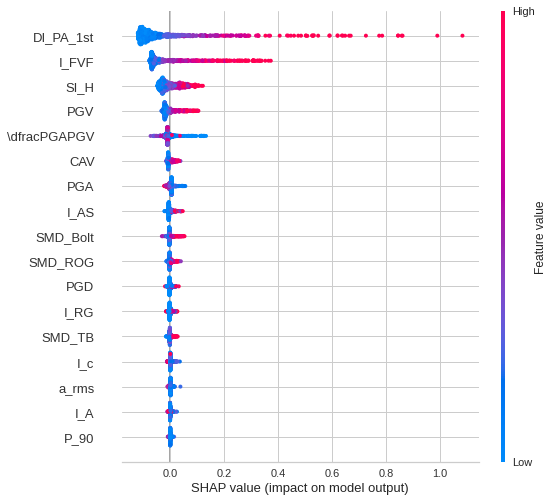

In [70]:
interpret_model(best)

In [71]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…